# Notebook Description

In this notebook we test the modified variational state, in order to further probe the Hilbert space.

In [1]:
import numpy as np
import scipy 

import matplotlib.pyplot as plt

import class_diag_hamiltonian as diag_heff
import class_energy as energy
import class_mass_size as mass_size

In [2]:
def plot_rotor_wavefunction(x, chosen_My, chosen_Mx, psi):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    ##plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 18 

    fig, axs = plt.subplots(chosen_My,chosen_Mx, subplot_kw=dict(polar=True))
    #plt.suptitle(r'$V_0 =$'+str(V_0), fontsize=font_size)

    for i in range(chosen_My):
         for j in range(chosen_Mx):
            axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_My/2))%chosen_My], color='lightcoral')

            axs[i, j].set_yticklabels([])
            axs[i, j].set_xticklabels([])
            axs[i, j].set_theta_zero_location('E')

            axs[i, j].grid(linewidth=0.5)
            axs[i, j].spines['polar'].set_linewidth(0.3) #.set_visible(False)

    #axs[0, 0].set_theta_zero_location('E')
    #lines, labels = axs[0, 0].set_thetagrids((0, 45, 90, 135, 180), (r'0', ' ', r'$\pi/2$', ' ', r'$\pi$'))


### Create Param Object and read reference configuration

In [3]:
params = {"n": 256,
"M": 36,
"Mx": 6,
"converge_new_lattice": "no",
"My": 6,
"B": 1.0,
"tx": 90,
"ty": 100,
"V_0": 90.0,
"qx": 0,
"qy": 0,
"init_choice": " ",
"external_wf_tag": " ",
"excitation_no": 11,
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-12}

x = (2*np.pi/params["n"])*np.arange(params["n"])

Mx = params["Mx"]
My = params["My"]

n = params["n"]

tx = params["tx"]
ty = params["ty"]

B = params["B"]

scale = B 

exc_number = params["excitation_no"]

q = np.array([0,0])

coupl_object = energy.coupling_of_states(params=params)
diag_object = diag_heff.diagonalization(params=params)
mult_ref_object = diag_heff.multi_ref_ci(params=params)

### Create a variational state with a vertical domain wall with gaussians

Energy init vertical d wall state = ((-385.8183427976718-3.3005675665709193e-20j), (-378.75462946308653+0j), (0.004627844425387593-3.3005675665709193e-20j), (-7.068341179010655+0j))
Norm init vertical d wall state   = (1.000000000000008+0j)


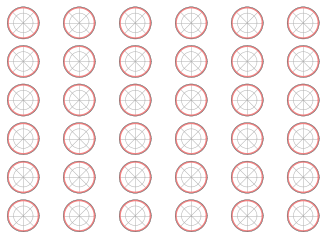

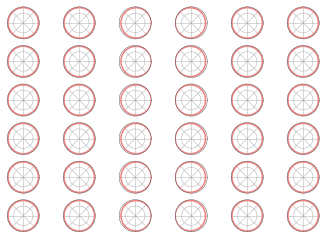

In [5]:
diag_object.sigma_gaussian = 6

psi = (1/n**0.5)*np.ones((My,Mx,n), dtype=complex)
psi_v = diag_object.apply_fdv_bias_coefficients(psi)

energy_psi_v = coupl_object.calc_hamiltonian_matrix_element(psi_v, q, psi_v, q)
overlap = coupl_object.calc_overlap(psi_v, psi_v)

print('Energy init vertical d wall state =', energy_psi_v)
print('Norm init vertical d wall state   =', overlap)

plot_rotor_wavefunction(x, My, Mx, np.abs(psi)**2)
plot_rotor_wavefunction(x, My, Mx, np.abs(psi_v)**2)

### Time evolution for one single $\sigma$ value

Iter = 0 , Overlap = (0.7514452983905003+4.753064124158871e-13j)
Iter = 1 , Overlap = (0.7749327906214302+6.392592343205361e-14j)
Iter = 0 , Overlap = (0.9914686642516919-1.3110920050005103e-13j)
Iter = 1 , Overlap = (0.9931060033151616+6.515201962587347e-15j)
Iter = 2 , Overlap = (0.9945383194368445+3.8464431959221e-15j)
Iter = 3 , Overlap = (0.9948795957454669+2.3749131174188893e-15j)
Iter = 4 , Overlap = (0.995724463687181-5.073272039095601e-15j)
[-399.46387403-1.45370263e-17j -403.04611742-1.15616350e-17j
 -405.99902477-4.55750002e-17j -408.61513879+3.40509516e-17j
 -410.87220532+2.65653466e-17j]
[0.99146866-1.31109201e-13j 0.993106  +6.51520196e-15j
 0.99453832+3.84644320e-15j 0.9948796 +2.37491312e-15j
 0.99572446-5.07327204e-15j]


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


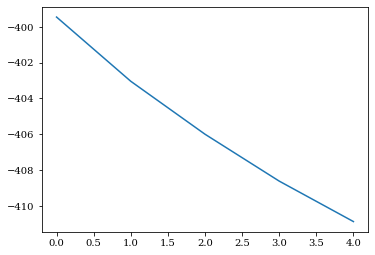

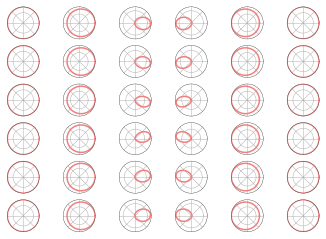

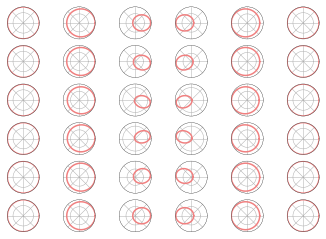

In [6]:
sigma_gauss = 2.1

mult_ref_object.set_phase_bool = True

diag_object.sigma_gaussian = sigma_gauss

psi = (1/n**0.5)*np.ones((My,Mx,n), dtype=complex) # uniform
psi_v = diag_object.apply_fdv_bias_coefficients(psi)

q = np.array([0,0])

iter_number = 2
new_ref_gs_test, new_ref_gs_test_bare, conv_energ_gs_test, overlap_arr_test = mult_ref_object.creat_new_ref_state_with_bias_field(iter_number, psi, q, sigma_gauss)

iter_number = 5
new_ref_gs_test, conv_energ_gs_test, overlap_arr_test = mult_ref_object.creat_new_ref_state(iter_number, new_ref_gs_test, q)

print(conv_energ_gs_test)
print(overlap_arr_test)
plt.plot(conv_energ_gs_test)

plot_rotor_wavefunction(x, My, Mx, np.abs(new_ref_gs_test)**2)
plot_rotor_wavefunction(x, My, Mx, np.abs(new_ref_gs_test_bare)**2)

### Time evolutions for different $\sigma$ values

In [38]:
sigma_gauss_list = np.array([1,2,3,4,5,6,7])  #np.array([2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9]) # np.array([1,2,3,4,5,6,7,8,10]) 
iter_number = 800

mult_ref_object.set_phase_bool = True
psi = (1/n**0.5)*np.ones((My,Mx,n), dtype=complex)

q = np.array([0,0])

energ_array = np.zeros((len(sigma_gauss_list)), dtype=complex)
conv_array = np.zeros((len(sigma_gauss_list),120), dtype=complex)
for i in range(len(sigma_gauss_list)):
    sigma_gauss = sigma_gauss_list[i]

    diag_object.sigma_gaussian = sigma_gauss
    psi_v = diag_object.apply_fdv_bias_coefficients(psi)

    iter_number = 3
    new_ref_gs_test, new_ref_gs_test_bare, conv_energ_gs_test, overlap_arr_test = mult_ref_object.creat_new_ref_state_with_bias_field(iter_number, psi, q, sigma_gauss)

    iter_number = 120
    new_ref_gs_test, conv_energ_gs_test, overlap_arr_test = mult_ref_object.creat_new_ref_state(iter_number, new_ref_gs_test, q)

    energ_array[i] = conv_energ_gs_test[-1]
    conv_array[i]  = conv_energ_gs_test

Iter = 0 , Overlap = (0.03183990824219025-1.0985126639850528e-14j)
Iter = 1 , Overlap = (0.6365624823610498-5.636844277768059e-12j)
Iter = 2 , Overlap = (0.8844781601693306-1.0828575354397024e-10j)
Iter = 0 , Overlap = (0.9943385396398265-1.4525878519636067e-10j)
Iter = 1 , Overlap = (0.9952320514449673-1.755768420019181e-11j)
Iter = 2 , Overlap = (0.996020146417657-1.905778147237445e-11j)
Iter = 3 , Overlap = (0.9963877584781032-1.7398020515554453e-11j)
Iter = 4 , Overlap = (0.9969237234098225-2.0349805240101713e-11j)
Iter = 5 , Overlap = (0.9971750983365033-2.1217156051963666e-11j)
Iter = 6 , Overlap = (0.9975864893039591-2.3597156290069287e-11j)
Iter = 7 , Overlap = (0.9977694094277941-2.4787245492427777e-11j)
Iter = 8 , Overlap = (0.9980921141670268-2.6607005323247167e-11j)
Iter = 9 , Overlap = (0.9982275446151588-2.7359398054812168e-11j)
Iter = 10 , Overlap = (0.9984833396943052-2.84718087421559e-11j)
Iter = 11 , Overlap = (0.9985848508862368-2.8399680186528375e-11j)
Iter = 12 , O

/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


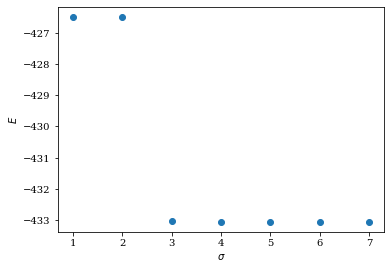

(-433.04670019896156+6.390625418530515e-19j)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


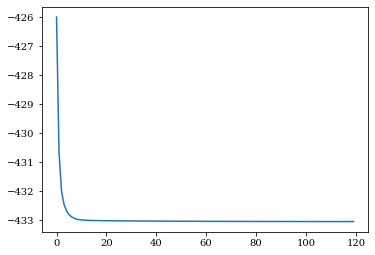

In [42]:
plt.scatter(sigma_gauss_list, energ_array)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$E$')
plt.show()
plt.plot(conv_array[3])
print(np.min(energ_array))